In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rcParams
rcParams['figure.figsize'] = 10, 5
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

berikut ini adalah kasus Memprediksi perilaku untuk mempertahankan pelanggan. Anda dapat menganalisis semua data pelanggan yang relevan dan mengembangkan program retensi pelanggan yang terfokus.

In [2]:
data = pd.read_csv("telco_customer.csv")
data.sample(8)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4217,8107-KNCIM,Male,1,Yes,No,14,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.10,1013.35,No
83,9919-YLNNG,Female,0,No,No,42,Yes,No,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.80,4327.5,No
2285,4307-KTUMW,Male,0,Yes,No,53,Yes,Yes,Fiber optic,Yes,No,Yes,No,No,Yes,Month-to-month,No,Electronic check,93.90,5029.2,Yes
3616,8707-RMEZH,Female,1,Yes,No,69,Yes,No,Fiber optic,Yes,Yes,No,No,No,Yes,One year,No,Credit card (automatic),87.30,6055.55,No
2133,8051-HJRLT,Female,1,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.55,70.55,Yes
1526,2984-AFWNC,Female,0,No,No,3,Yes,No,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,No,Electronic check,95.40,293.15,No
1891,4193-ORFCL,Female,1,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,45.10,45.1,Yes
863,9944-HKVVB,Female,0,No,No,3,Yes,No,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.10,307.4,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 




1.   data terlihat tidak ada missing value, tetapi ada data yang terlihat invalid values yaitu TotalCharges, karena seharusnya data bertipe float.

2.   variable data ini masih mengandung 2 tipe data yaitu string dan numerikal, untuk dari itu perlu dibagi menjadi 2 agar dapat dilakukan statistika deskriptif sehingga dapat melihat karakteristik data itu sendiri.

3.   pada kolom data target/label (churn) seharusnya bertipe kategorikal, bukan object/ string, sehingga perlu diubah menjadi kategorikal terlebih dahulu




In [4]:
#melihat nama kolom format list
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
cat = ['customerID','gender', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'TotalCharges','Churn']

num = ['SeniorCitizen','tenure' ,'MonthlyCharges']

In [6]:
data[cat].describe()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,3177-LASXD,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


1. sepertinya tidak ada duplikat karena nilai unique = jumlah customerID
2. gender hanya 2 jenis, gender yang paling banyak adalah pria yaitu sebanyak 3555, dan hanya selisih 67 orang
3. pelanggan kebanyakan tidak bermitra artinya konsumsi individual 
4. pelanggan kebanyakan tidak memiliki tanggungan / lajang
5. pelanggan kebanyakan memiliki layanan telepon 
6. pengguna kebanyakan menggunakan fiber optic untuk trasfer data karena kecepatanya 
7. pelanggan kebanyakan tidak memiliki keamanan jaringan
8. pelanggan kebanyakan tidak melakukan subcribe TV/ MOVIES
9. metode pembayaran kebanyakn check elektronik 
10. pelanggan kebanyakn tidak churn (5174/ 7043) sehingga dapat dikatakan pelanggan rata-rata cukup loyal


In [7]:
data[num].describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


1. pelanggan rata-rata warga negara tidak senior (belum ber-KTP)
2. rata-rata masa kerjasama pelanggan dengan perusahaan adalah 32 bulan
3. tagihan bulan pelanggan rata-rata $ 64.76 
4. dari ketiga kolom numerikal terlihat bahwa distribusi data tidak terlalu skew dan sepertinya perlu dilakuakn scaling data agar mengecilkan rentang nilai sehingga akan membuat nilai akurasi prediksi meningkat

In [8]:
for col in cat:
    print(f'''Value count kolom {col}:''')
    print(data[col].value_counts())
    print()

Value count kolom customerID:
3177-LASXD    1
0520-FDVVT    1
5803-NQJZO    1
6061-GWWAV    1
9881-VCZEP    1
             ..
3378-AJRAO    1
7049-GKVZY    1
8457-XIGKN    1
4718-DHSMV    1
7402-EYFXX    1
Name: customerID, Length: 7043, dtype: int64

Value count kolom gender:
Male      3555
Female    3488
Name: gender, dtype: int64

Value count kolom Partner:
No     3641
Yes    3402
Name: Partner, dtype: int64

Value count kolom Dependents:
No     4933
Yes    2110
Name: Dependents, dtype: int64

Value count kolom PhoneService:
Yes    6361
No      682
Name: PhoneService, dtype: int64

Value count kolom MultipleLines:
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

Value count kolom InternetService:
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

Value count kolom OnlineSecurity:
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSec

terlihat label timpang jauh, sehingga perlu dilakukan overlapping sehingga akan membentuk keseimbangan data target/ label

data dapat dilihat persebaran data kategorikalnya sehingga kemungkinan dilakuakan encoding data

In [9]:
#merubah tipe data TotalCharges menjadi numerikal
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors="coerce")
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


terdapat data missing values pada TotalCharges sehingga perlu dihapus karena jumlahnya sedikit (data <= 10%)

In [10]:
data.isnull().sum() #validasi missing value 

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
data.dropna(subset=["TotalCharges"], inplace=True) #menghapus data missing value
data.isnull().sum() #checking missing value

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
#cek apakah ada data duplikat?
print(data.duplicated().sum()) #ternyata tidak ada duplicated data

0


In [13]:
data.shape #sudah berkurang dataset -11

(7032, 21)

In [14]:
data['Churn'].replace(to_replace='Yes', value=1, inplace=True)
data['Churn'].replace(to_replace='No',  value=0, inplace=True)

UNIVARIATE ANALYSIS : melihat karakteristik data per kolom

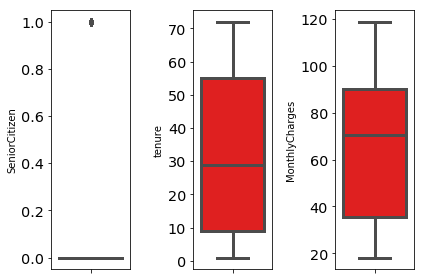

In [ ]:
for i in range(0, len(num)):
    plt.subplot(1, len(num), i+1)
    sns.boxplot(data[num[i]], color='red', orient='v')
    plt.tight_layout() 
#terlihat sepertinya tidak ada data outlier pada VARIABLE data num, tetapi kita perlu melakukan validasi dgn IQR

<Figure size 864x360 with 0 Axes>

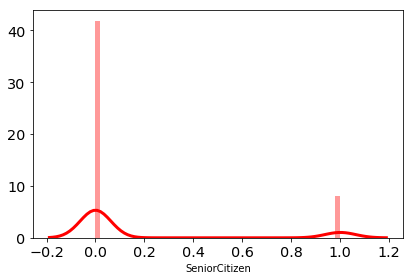

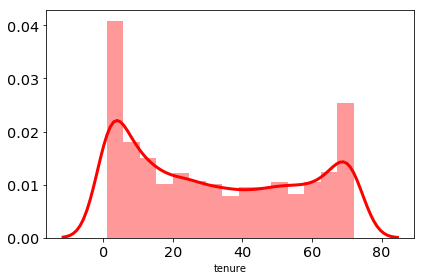

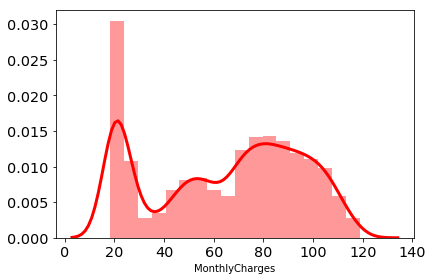

In [ ]:
plt.figure(figsize=(12, 5))
for i in range(0, len(num)):
    plt.figure()
    sns.distplot(data[num[i]], color='red')
    plt.tight_layout() #sebaran distribusi

sepertinya perlu melakukan scaling pada kolom tenure dan monthlycharges karena terlihat skew, bisa kita cek nilai skewnya
(tidak ada totalcharges karena kemungkinan bersifat multikolinearitas terhadap monthlycharges)

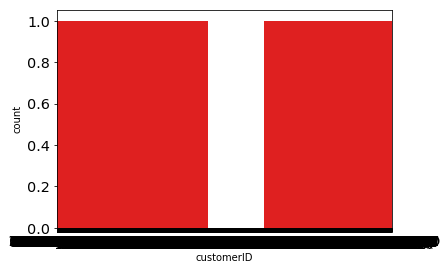

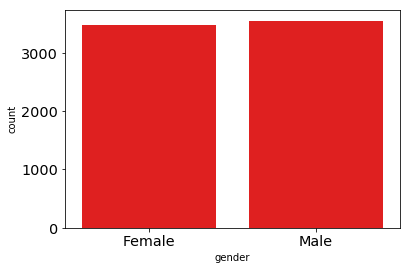

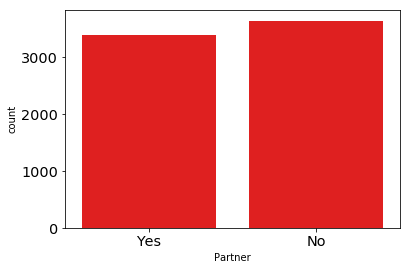

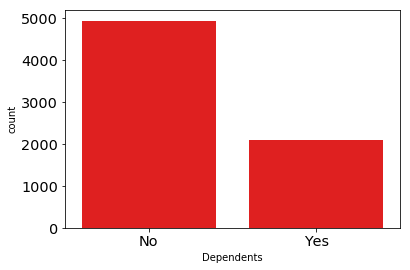

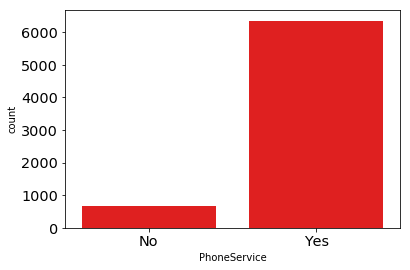

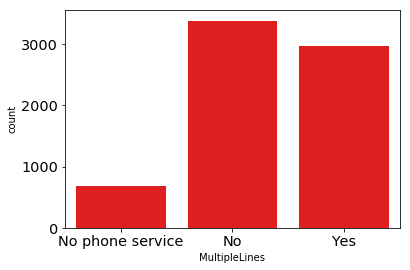

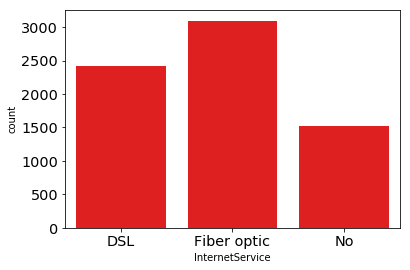

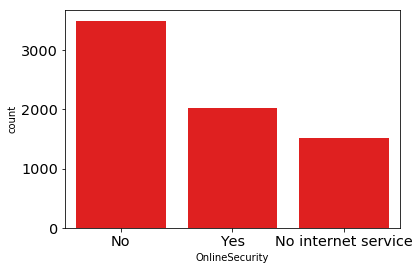

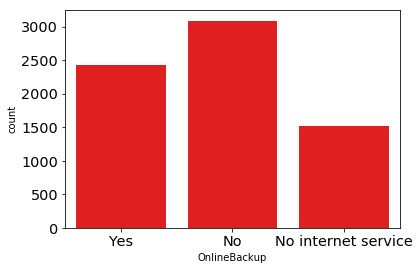

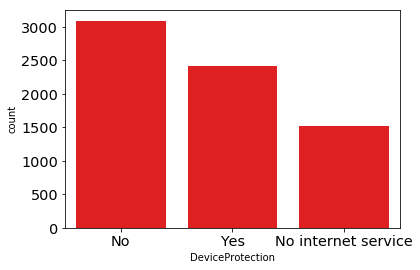

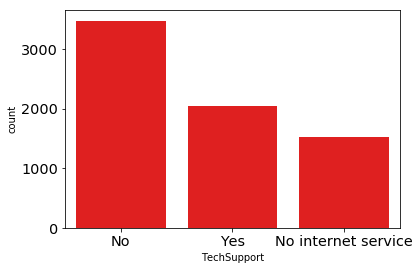

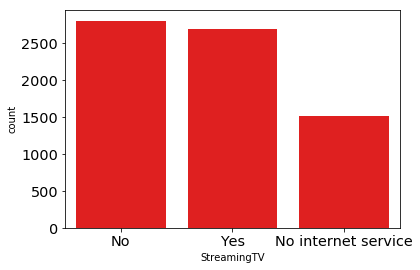

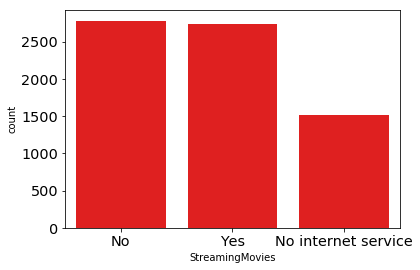

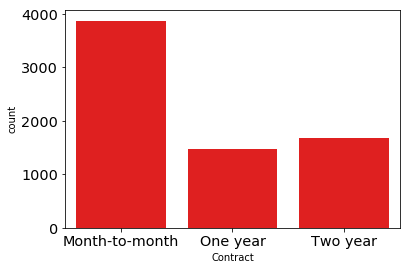

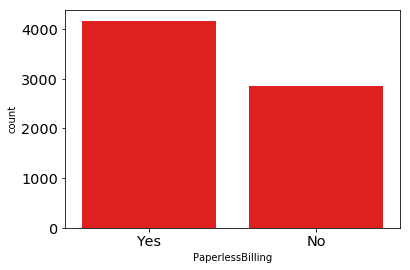

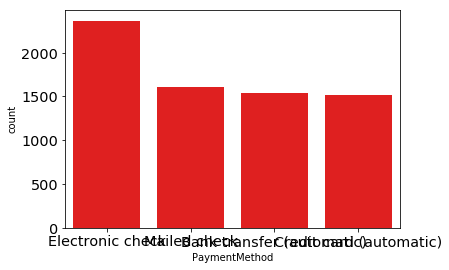

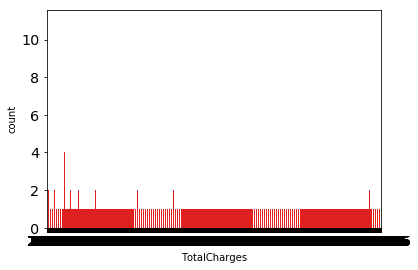

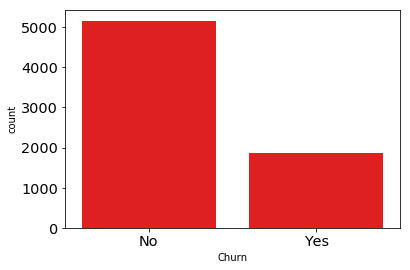

In [ ]:
for i in range(0, len(cat)):
    plt.figure()
    sns.countplot(data[cat[i]], color='red')

1. selisih proporsi kolom gender, partner tidak signifikan
2. kolom dependent memiliki jumlah "No" yang lebih besar dan signifikan terhadap "yes"
3. kebanyakn pelanggan memiliki layanan telepon
4. pelanggan kebanyakan menggunakan fiber optic daripada DSL karena kecepatan transmisi data
5. pelanggan kebanyakan tidak peduli terhadap keamanan data "terbukti pelanggan mayoritas tidak menggunakan keamanan online, bahkan untuk perihal kemanann device mereka juga tidak memperdulikannya
6. untuk layanan tambahan seperti streaming tv, film cukup imbang antara pengguna layanan tersebut dengan tidak
7. untuk kontrak layanan mereka lebih percaya terhadap jangka bulanan
8. untuk metode pembayaran mereka menyukai sistem praktis (online) dengan metode pembayaran terbanyak terdapat pada electronic check
9. proporsi antara pelanggan churn dengan tidak churn cukup signifikan, tetapi perlu ditingkatkan kembali dan terjadi imbalance data




In [15]:
print(f'Jumlah baris sebelum memfilter outlier: {len(data)}')
#handle outlier by univariate analysis
filtered_entries = np.array([False] * len(data))
for col in ['SeniorCitizen','tenure','MonthlyCharges','TotalCharges','Churn']:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((data[col] < low_limit) | (data[col] > high_limit)) | filtered_entries
    
data1 = data[~filtered_entries]
print(f'Jumlah baris setelah memfilter outlier: {len(data1)}')

Jumlah baris sebelum memfilter outlier: 7032
Jumlah baris setelah memfilter outlier: 5890


terlihat data terdapat outlier, terbukti dengan pengurangan jumlah data pada tipe data numerikal

In [16]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
## melakukan scaling data yang bertipe numerikal

data1['tenure_norm'] = MinMaxScaler().fit_transform(data1['tenure'].values.reshape(len(data1), 1))
data1['TotalCharges_norm'] = MinMaxScaler().fit_transform(data1['TotalCharges'].values.reshape(len(data1), 1))
data1['MonthlyCharges_norm'] = MinMaxScaler().fit_transform(data1['MonthlyCharges'].values.reshape(len(data1),1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [17]:
data1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_norm,TotalCharges_norm,MonthlyCharges_norm
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0.000000,0.001275,0.115423
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,0.464789,0.215867,0.385075
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0.014085,0.010310,0.354229
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,0.619718,0.210241,0.239303
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0.014085,0.015330,0.521891


In [18]:
data2 = data1.drop(['tenure','MonthlyCharges','TotalCharges','customerID'], 1)
#menghapus kolom 'tenure','MonthlyCharges','TotalCharges', 'customerID' karena dianggap tidak penting

In [19]:
data3 = pd.get_dummies(data2)
data3.head()

,SeniorCitizen,Churn,tenure_norm,TotalCharges_norm,MonthlyCharges_norm,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0.000000,0.001275,0.115423,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0,0,0.464789,0.215867,0.385075,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,0,1,0.014085,0.010310,0.354229,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,0,0,0.619718,0.210241,0.239303,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,0,1,0.014085,0.015330,0.521891,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


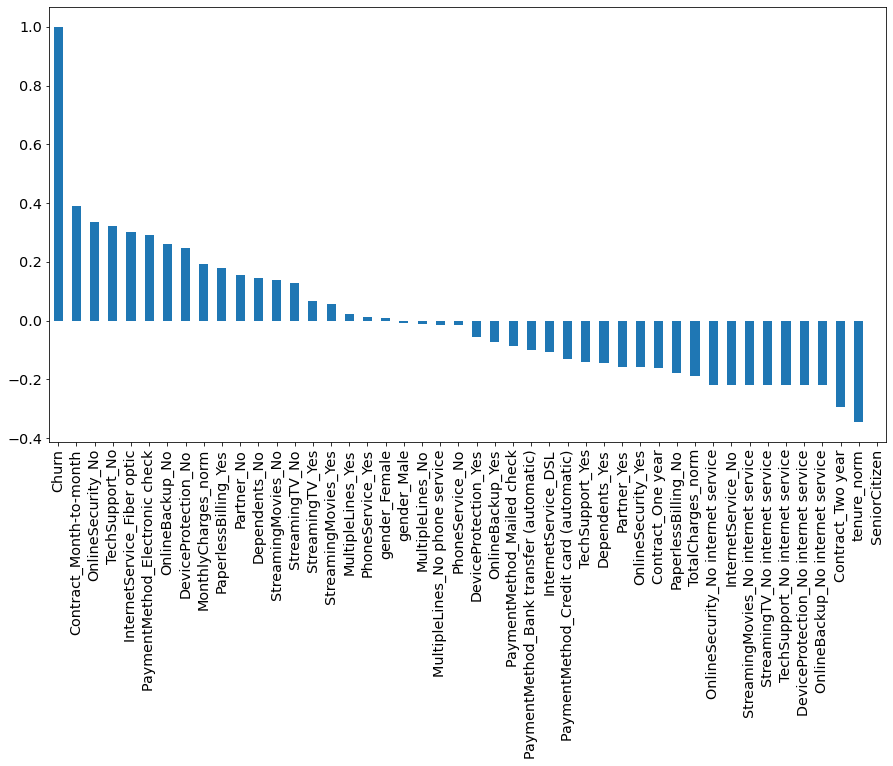

In [20]:
#BIVARIATE ANALYSIS
#cek korelasi antar feature
plt.figure(figsize=(15,8))
data3.corr()['Churn'].sort_values(ascending = False).plot(kind='bar') 

terlihat korelasi positif cukup tinggi hanya sedikit yaitu kontrak bulan ke bulan, onlinesecurity_no, techsupport_no, internetservicefiberoptic,paymentmethod_electronic_check,online_backup_no, device_protection_no (korelasi > 0.2)
sedagkan korelasi negatif cukup tinggi hanya tenure dan kontrak 2 tahun, sehingga kita perlu tindakan berupa modifikasi datanya agar memiliki korelasi tinggi (korelasi >=0.5) sehingga mudah dalam tahap feature selection.

In [90]:
#karena data imbalance 
data3['churn_class'] = data3['Churn'] > 0.8
data3['churn_class'].value_counts()

False    4497
True     1393
Name: churn_class, dtype: int64

In [91]:
X = data3[[col for col in data3.columns if (str(data3[col].dtype) != 'object') and col not in ['Churn', 'churn_class']]]
y = data3['churn_class'].values
print(X.shape)
print(y.shape)

(5890, 45)
(5890,)


In [105]:
from imblearn.over_sampling import SMOTE
## undersampling agar ringan beban komputasinya
from imblearn import under_sampling
X_over, y_over = under_sampling.RandomUnderSampler().fit_resample(X, y)
pd.Series(y_over).value_counts()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


True     1393
False    1393
dtype: int64

Text(0.5, 1.0, 'PROPORSI CHURN (%)')

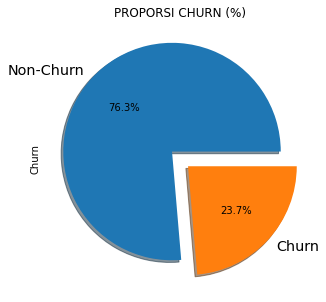

In [ ]:
#EDA VISUALIZATION
labels = 'Non-Churn', 'Churn'
data3['Churn'].value_counts().plot.pie(explode=[0.1,0.1],labels=labels, autopct='%1.1f%%',shadow=True,figsize=(5,5));
plt.title("PROPORSI CHURN (%)")

terlihat banyak yang tidak churn, tetapi ini akan terjadi imbalance data dalam prediksi

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

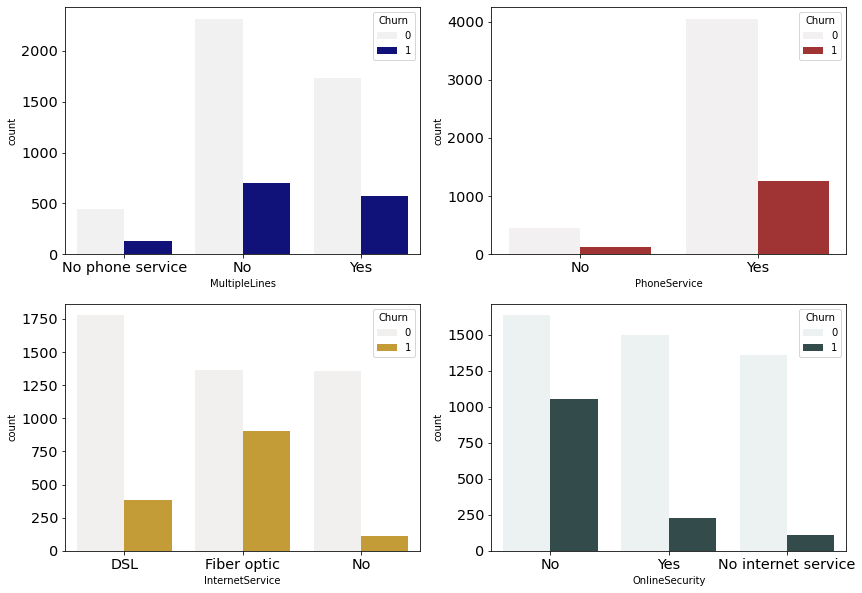

In [ ]:
fig, ax =plt.subplots(nrows=2,ncols=2,figsize=(14,10))
sns.countplot('MultipleLines',hue='Churn',data=data2,color='darkblue',ax=ax[0,0])
sns.countplot('PhoneService',hue='Churn',data=data2,color='firebrick',ax=ax[0,1])
sns.countplot('InternetService',hue='Churn',data=data2,color='goldenrod',ax=ax[1,0])
sns.countplot('OnlineSecurity',hue='Churn',data=data2,color='darkslategray',ax=ax[1,1])
plt.show()

1. pelanggan yang memakai saluran fiberoptic lebih cenderung mengalami churn daripada DSL
2. pelanggan yang hanya memiliki internet dan tanpa koneksi seluler merasa puas dengan layanan dibuktikan dengan proporsi churn yang lebih kecil
3. pelanggan yang memiliki saluran yang lebih dari satu mengalami ketidakpuasan layanan, ini menjadi pertanyaan, mengapa ia memiliki banyak saluran tetapi cenderung mengalami churn?
4. pelanggan yang tidak menggunakan sistem keamanan cenderung mengalami churn, hal ini mungkin karena keamanan data pelanggan yang begitu penting

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

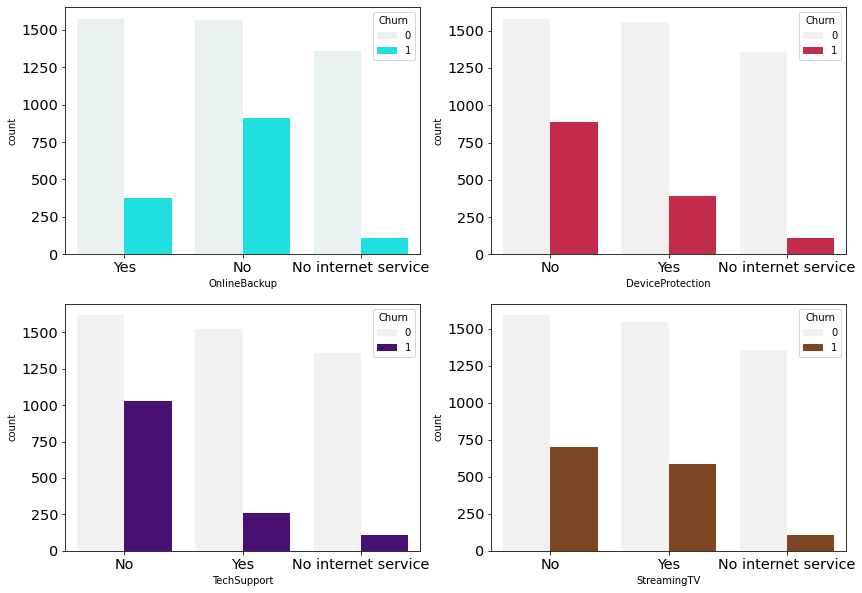

In [ ]:
fig, ax =plt.subplots(nrows=2,ncols=2,figsize=(14,10))
sns.countplot('OnlineBackup',hue='Churn',data=data2,color='aqua',ax=ax[0,0])
sns.countplot('DeviceProtection',hue='Churn',data=data2,color='crimson',ax=ax[0,1])
sns.countplot('TechSupport',hue='Churn',data=data2,color='indigo',ax=ax[1,0])
sns.countplot('StreamingTV',hue='Churn',data=data2,color='saddlebrown',ax=ax[1,1])
plt.show()

1. pelanggan yang tanpa layanan onlinebackup cenderung mengalami churn, hal ini mungkin karena pentingnya penyimpanan data
2. pelanggan yang tidak menggunakan perlindungan device cenderung mengalami churn, hal ini bisa lakukan promosi perlindungan device untuk meningkatkan keuntungan
3. pelanggan berikan dukungan teknis yang tepat untuk meningkatkan kepuasan pelanggan dan mengurangi churn.
4. Streaming tv: Streaming TV dan Streaming Film tidak berpengaruh besar pada churn rate; Namun, jika pelanggan tidak memiliki layanan internet, kemungkinan besar dia tidak akan churn.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

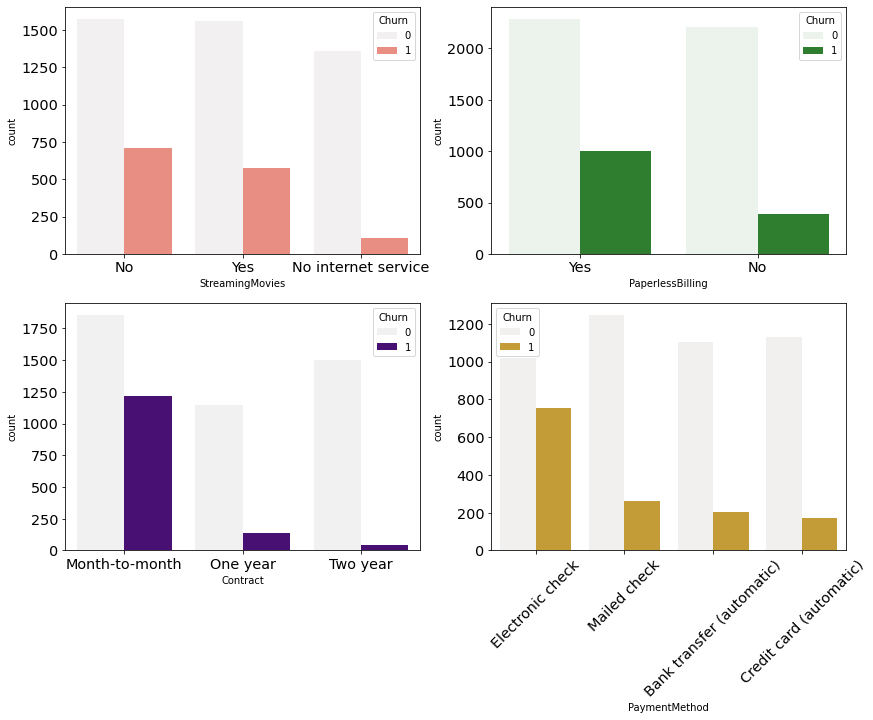

In [ ]:
fig, ax =plt.subplots(nrows=2,ncols=2,figsize=(14,10))
sns.countplot('StreamingMovies',hue='Churn',data=data2,color='salmon',ax=ax[0,0])
sns.countplot('PaperlessBilling',hue='Churn',data=data2,color='forestgreen',ax=ax[0,1])
sns.countplot('Contract',hue='Churn',data=data2,color='indigo',ax=ax[1,0])
sns.countplot('PaymentMethod',hue='Churn',data=data2,color='goldenrod',ax=ax[1,1])
plt.xticks(rotation=45)
plt.show()

1. Penagihan Tanpa Kertas: Pelanggan yang memiliki penagihan tanpa kertas lebih cenderung melakukan churn.
2. Metode Pembayaran: Pelanggan yang menggunakan cek elektronik untuk membayar tagihan lebih cenderung melakukan churn daripada mereka yang menggunakan metode pembayaran lain.
3. Kontrak: Tingkat churn turun seiring bertambahnya masa panjang kontrak.

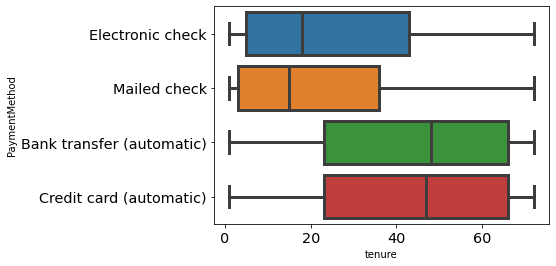

In [ ]:
sns.boxplot(x='tenure', y='PaymentMethod', data = data)

pelanggan yang menggunakan metode pembayaran dengan bank transfer dan credit card  memiliki masa tenure yang lebih lama

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

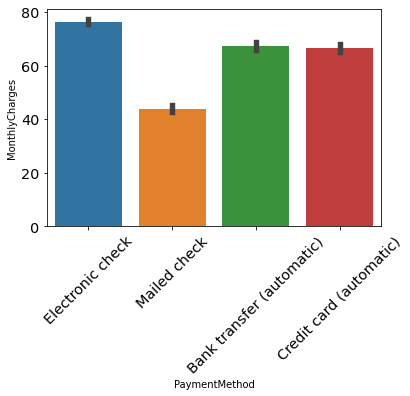

In [ ]:
sns.barplot(x='PaymentMethod', y='MonthlyCharges', data=data);
plt.xticks(rotation=45)

In [ ]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5890 entries, 0 to 7042
Data columns (total 47 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            5890 non-null   int64  
 1   Churn                                    5890 non-null   int64  
 2   tenure_norm                              5890 non-null   float64
 3   TotalCharges_norm                        5890 non-null   float64
 4   MonthlyCharges_norm                      5890 non-null   float64
 5   gender_Female                            5890 non-null   uint8  
 6   gender_Male                              5890 non-null   uint8  
 7   Partner_No                               5890 non-null   uint8  
 8   Partner_Yes                              5890 non-null   uint8  
 9   Dependents_No                            5890 non-null   uint8  
 10  Dependents_Yes                           5890 no

<Figure size 1080x1080 with 0 Axes>

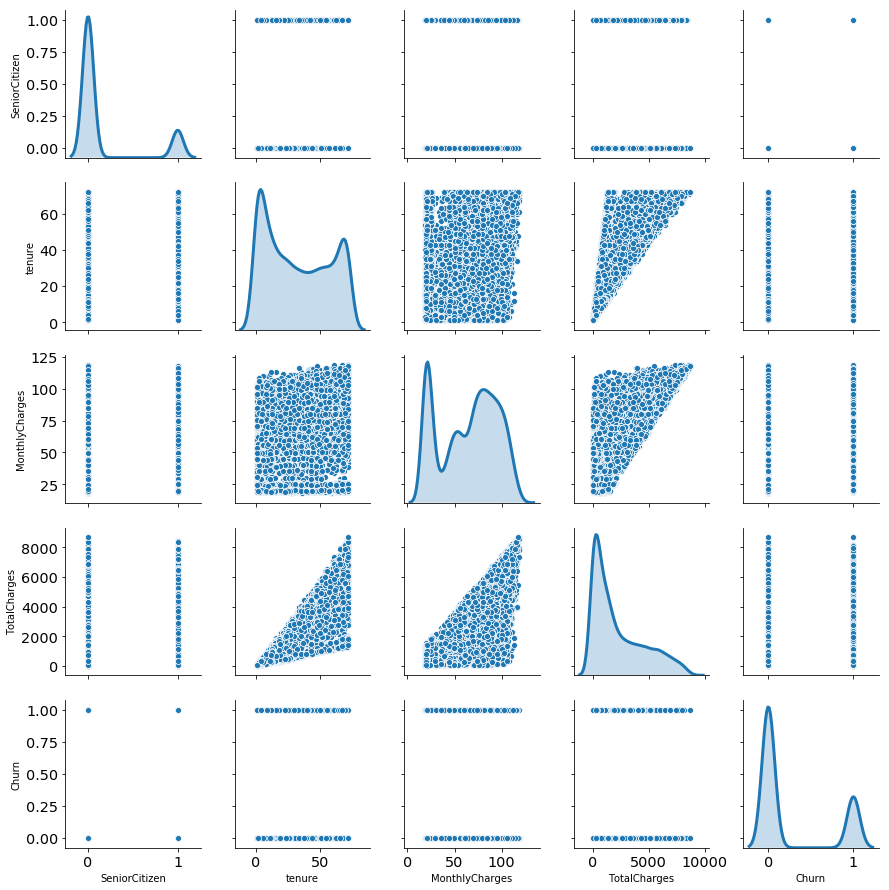

In [ ]:
plt.figure(figsize=(15, 15))
sns.pairplot(data, diag_kind='kde')

1. semakin meningkat tenure maka semakin meningkat pula total tagihannya
2. semakin meningkat tagihan bulanan maka semakin meningkat pula total tagihannya

In [ ]:
#pembagian jenis data yang terupdate
num1 = ['SeniorCitizen','tenure_norm' ,'MonthlyCharges_norm','TotalCharges_norm','Churn']

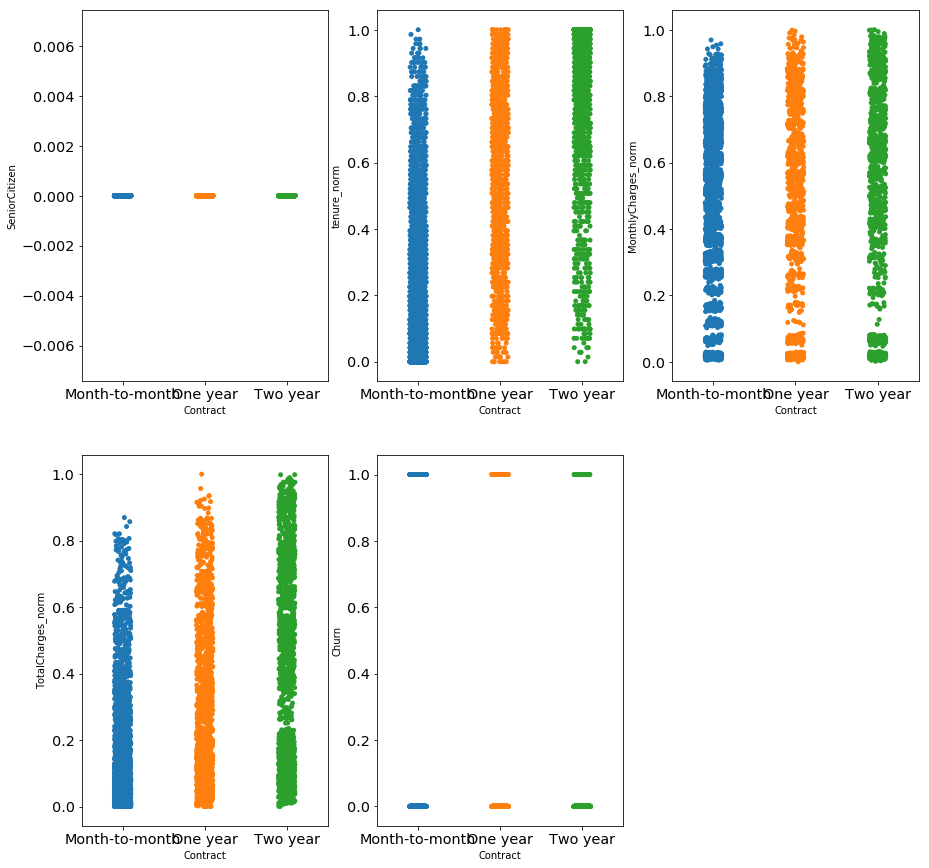

In [ ]:
#category plot untuk variable yang memiliki korelasi cukup tinggi
fig = plt.figure(figsize=(15, 15))
for i in range(0, 5):
    ax = fig.add_subplot(2, 3, i+1)
    sns.catplot(ax=ax, data=data2, x='Contract', y=num1[i])
    plt.tight_layout()

    if i != 0: plt.close(i+1)

    plt.close(len(num1) + 1)

pelanggan yang memiliki kontrak 2 tahun cenderung memiliki tagihan bulanan yang paling tinggi, tetapi perlu diperhatikan untuk kontrak bulanan tidak memiliki perbedaan total tagihan yang jauh.  

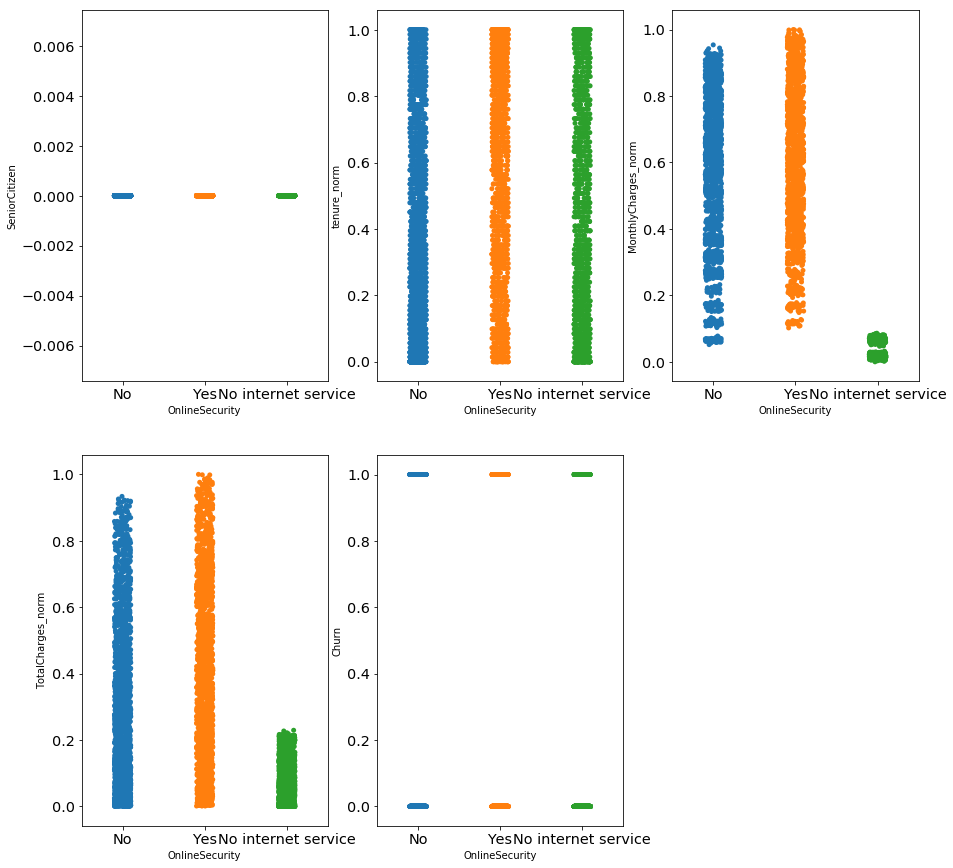

In [ ]:
#category plot untuk variable yang memiliki korelasi cukup tinggi
fig = plt.figure(figsize=(15, 15))
for i in range(0, 5):
    ax = fig.add_subplot(2, 3, i+1)
    sns.catplot(ax=ax, data=data2, x='OnlineSecurity', y=num1[i])
    plt.tight_layout()

    if i != 0: plt.close(i+1)

    plt.close(len(num1) + 1)

pelanggan yang menggunakan layanan online security (tidak ada layanan internet) memiliki total tagihan internet yang paling rendah

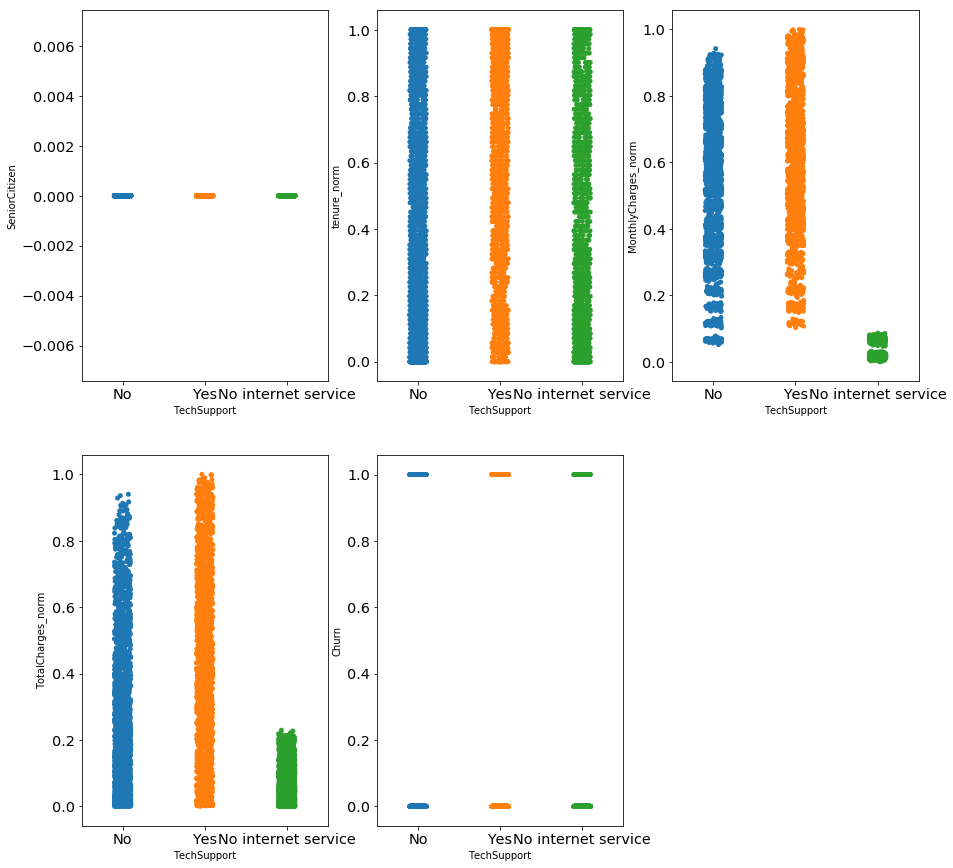

In [ ]:
#category plot untuk variable yang memiliki korelasi cukup tinggi
fig = plt.figure(figsize=(15, 15))
for i in range(0, 5):
    ax = fig.add_subplot(2, 3, i+1)
    sns.catplot(ax=ax, data=data2, x='TechSupport', y=num1[i])
    plt.tight_layout()

    if i != 0: plt.close(i+1)

    plt.close(len(num1) + 1)

layanan dukungan teknis (tidak ada layanan internet) memiliki total tagihan terkecil

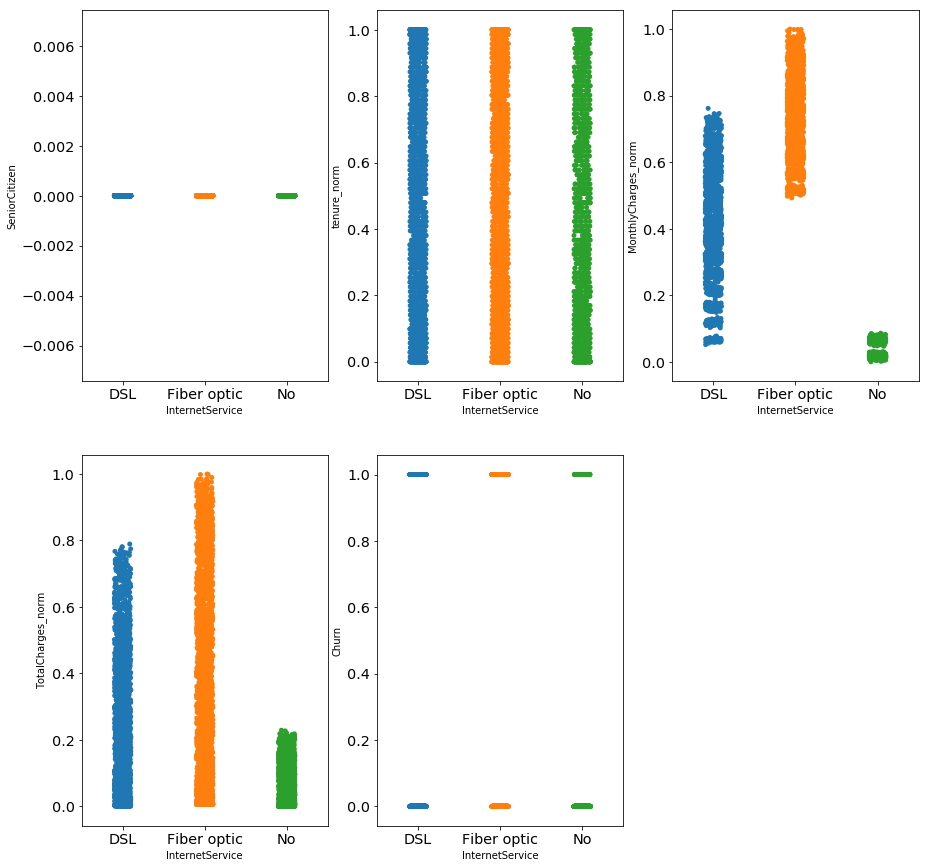

In [ ]:
#category plot untuk variable yang memiliki korelasi cukup tinggi
fig = plt.figure(figsize=(15, 15))
for i in range(0, 5):
    ax = fig.add_subplot(2, 3, i+1)
    sns.catplot(ax=ax, data=data2, x='InternetService', y=num1[i])
    plt.tight_layout()

    if i != 0: plt.close(i+1)

    plt.close(len(num1) + 1)

total tagihan terbesar pada layanan internet fiber optic

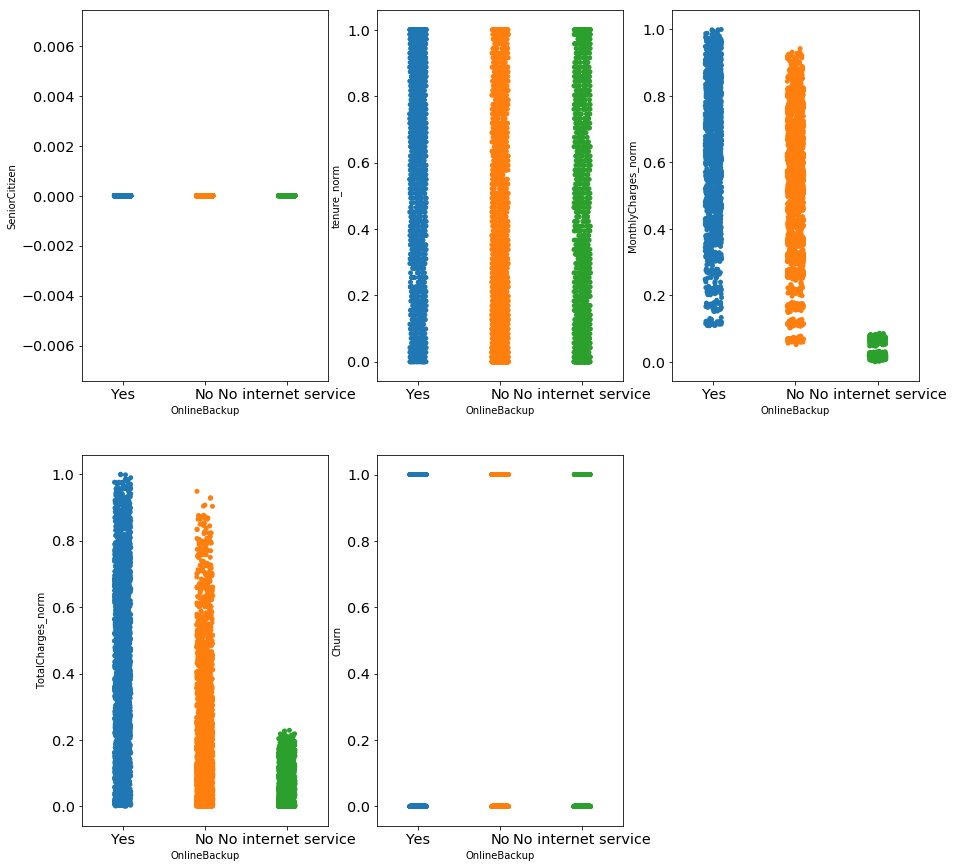

In [ ]:
#category plot untuk variable yang memiliki korelasi cukup tinggi
fig = plt.figure(figsize=(15, 15))
for i in range(0, 5):
    ax = fig.add_subplot(2, 3, i+1)
    sns.catplot(ax=ax, data=data2, x='OnlineBackup', y=num1[i])
    
    plt.tight_layout()
    if i != 0: plt.close(i+1)

    plt.close(len(num1) + 1)

total tagihan pelanggan yang membeli layanan online backup paling tinggi

In [ ]:
data2.groupby('PaymentMethod').mean() #terlihat metode pembayaran dengan electronic check cenderung mengalami churn

,SeniorCitizen,Churn,tenure_norm,TotalCharges_norm,MonthlyCharges_norm
PaymentMethod,,,,,
Bank transfer (automatic),0.0,0.156608,0.597252,0.338393,0.462450
Credit card (automatic),0.0,0.130769,0.591268,0.339894,0.458162
Electronic check,0.0,0.425748,0.335873,0.230799,0.557560
Mailed check,0.0,0.174834,0.296250,0.116605,0.244340


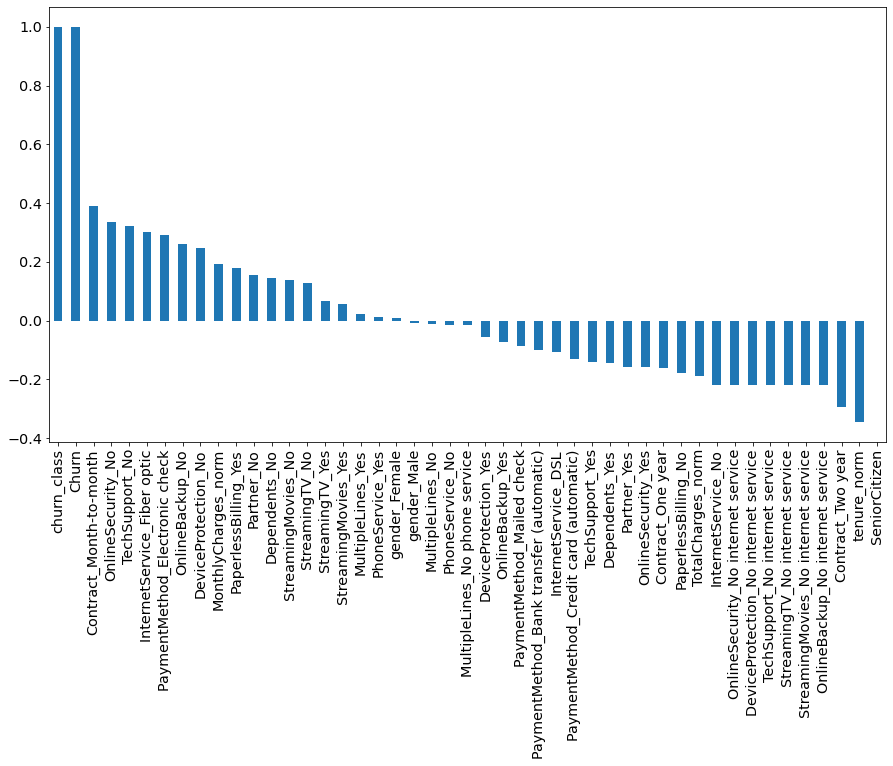

In [24]:
#cek korelasi antar feature
plt.figure(figsize=(15,8))
data3.corr()['Churn'].sort_values(ascending = False).plot(kind='bar') 

In [25]:
from scipy import stats #handle outlier dengan zscore untuk keseluruhan data (multivariate analysis)
print(f'Jumlah baris sebelum memfilter outlier: {len(data3)}')
## CODE HERE
filtered_entries = np.array([False] * len(data3))
for col in data3:
    zscore = abs(stats.zscore(data3[col]))
    print(np.max(zscore))
    filtered_entries = (zscore > 3) | filtered_entries
    
data4 = data3[~filtered_entries]
print(f'Jumlah baris setelah memfilter outlier: {len(data4)}')

Jumlah baris sebelum memfilter outlier: 5890
nan
1.796742685677483
1.6150925709904467
2.9125070016048467
1.8759086113438406
1.010239174846487
1.0102391748464872
1.0433851073642482
1.0433851073642482
1.3904196964481323
1.3904196964481323
3.037382828101266
3.037382828101266
1.0230152057463886
3.037382828101266
1.248456910277706
1.315539590258431
1.2650855706645905
1.735586811537087
1.091056989872946
1.735586811537087
1.5487835630264744
1.1754669727918965
1.735586811537087
1.4219924740318357
1.176696810829104
1.735586811537087
1.4203584170155379
1.1087703495832961
1.735586811537087
1.5195357067357596
1.2533673543741723
1.735586811537087
1.3281417777806848
1.255608589841452
1.735586811537087
1.3257038269176564
1.0426755095833529
1.8958860132800743
1.6806770435379084
1.1256680507285888
1.1256680507285888
1.870726604565668
1.8790341217682107
1.5250588939947387
1.7031330692742799
1.796742685677483
Jumlah baris setelah memfilter outlier: 5314


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:2419: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


In [26]:
data4.columns

Index(['SeniorCitizen', 'Churn', 'tenure_norm', 'TotalCharges_norm',
       'MonthlyCharges_norm', 'gender_Female', 'gender_Male', 'Partner_No',
       'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
     

In [27]:
data4.shape

(5314, 47)

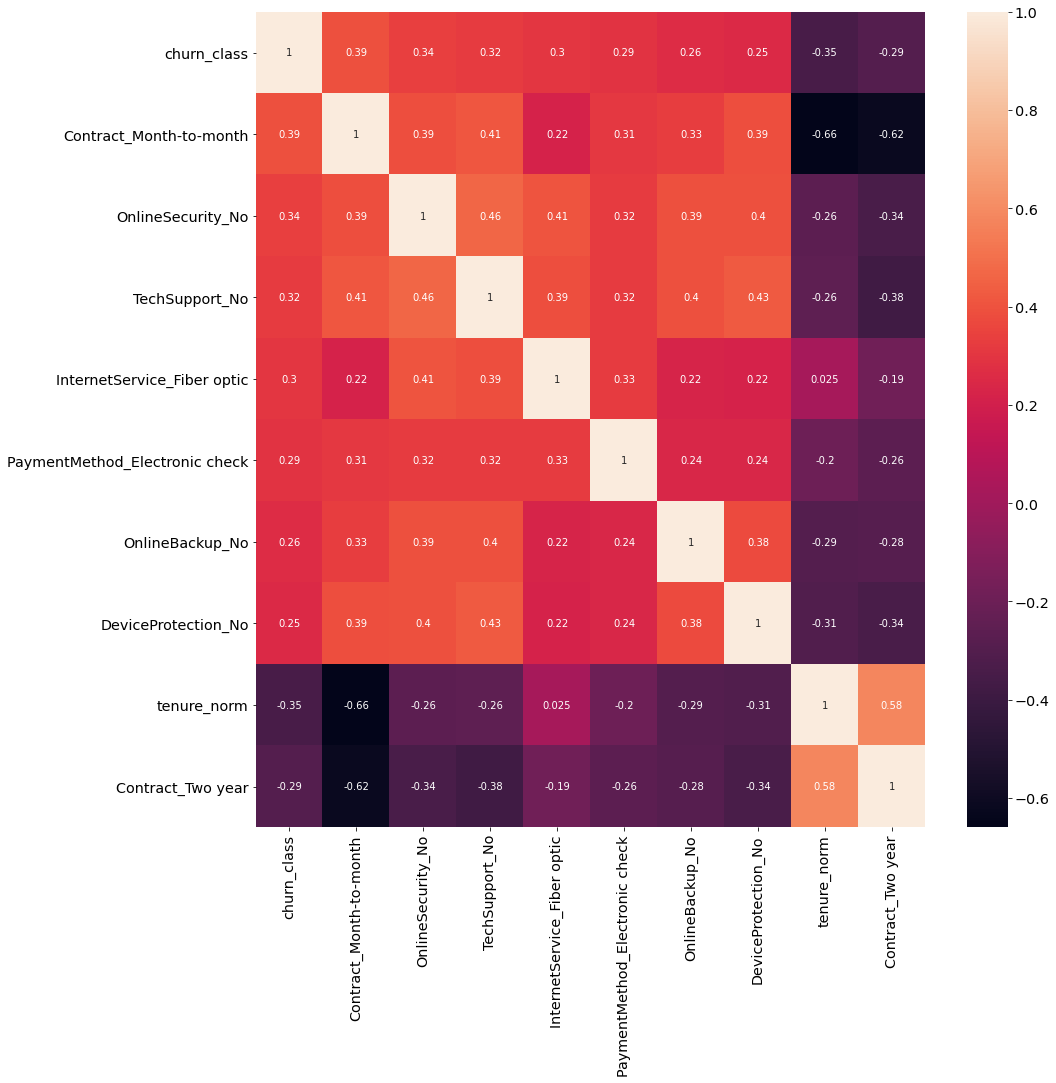

In [107]:
plt.figure(figsize=(15, 15))
sns.heatmap(data3[['churn_class','Contract_Month-to-month'
                  ,'OnlineSecurity_No','TechSupport_No','InternetService_Fiber optic','PaymentMethod_Electronic check',
                   'OnlineBackup_No','DeviceProtection_No','tenure_norm',
                   'Contract_Two year']].corr()
           ,annot=True)#perbesar

In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=75)

In [133]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [134]:
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test)) #model tertinggi ada pada logisticregression

0.8174872665534805


AxesSubplot(0.125,0.125;0.775x0.755)


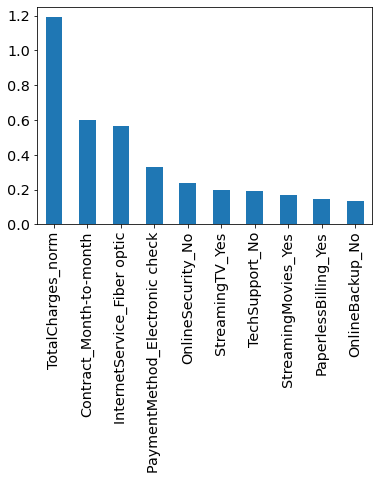

In [135]:
weights = pd.Series(model.coef_[0], #pembobotan variable
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


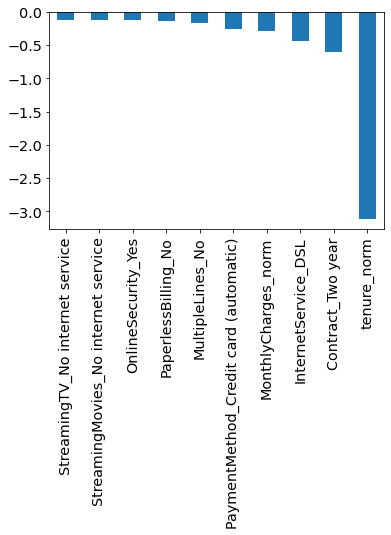

In [136]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar'))

In [137]:
#MODEL RANDOMFOREST
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=2000 , oob_score = True, n_jobs = -1,
                                  random_state =75, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.8039049235993209


In [129]:
from sklearn.svm import SVC #MODEL SVM
model.svm = SVC(kernel='linear') 
model.svm.fit(X_train,y_train)
preds = model.svm.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.8047538200339559

In [130]:
from sklearn.svm import SVC #MODEL SVM
model.svm = SVC(kernel='rbf') 
model.svm.fit(X_train,y_train)
preds = model.svm.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.8030560271646859

In [116]:
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
# n_estimators = 50 (default value) 
# base_estimator = DecisionTreeClassifier (default value)
model.fit(X_train,y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)#model tertinggi ketiga ada pada ensemble model XGB

0.8132427843803056

In [117]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)#model tertinggi kedua ada pada ensemble model XGB

0.8166383701188455